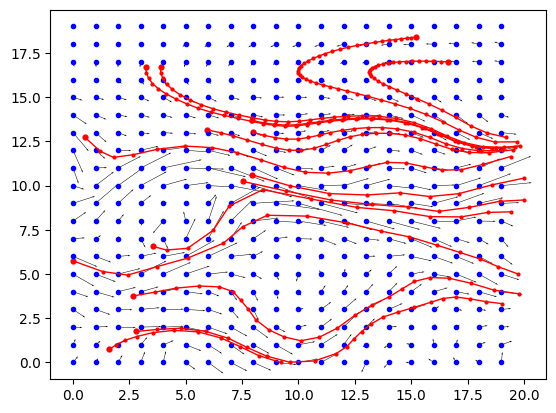

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Get data
vecs = np.reshape(np.fromfile("wind_vectors.raw"), (20,20,2))

# print(vecs)
vecs_flat = np.reshape(vecs, (400,2)) # useful for plotting
vecs = vecs.transpose(1,0,2) # needed otherwise vectors don't match with plot

# X and Y coordinates of points where each vector is in space
xx, yy = np.meshgrid(np.arange(0, 20),np.arange(0, 20))

np.random.seed(1)
seed_points = np.random.uniform(0,19,size=(15,2))

def Bilinear_interpolation(x, y, vecs):
   """  
   Input : position x, y and given velocity vector 
   it returns velocity vector at position (x,y) using Bilinear interpolation
   """
   x1 = int(np.floor(x))
   y1 = int(np.floor(y))
   x2 = x1 + 1 
   y2 = y1 + 1
   
   f_q11 = vecs[x1,y1]
   f_q12 = vecs[x1,y2]
   f_q21 = vecs[x2,y1]
   f_q22 = vecs[x2,y2]

   f_xy1 = (x2-x)/(x2-x1) * f_q11 + (x-x1)/(x2-x1) * f_q21
   f_xy2 = (x2-x)/(x2-x1) * f_q12 + (x-x1)/(x2-x1) * f_q22
   f_xy = (y2-y)/(y2-y1) * f_xy1 + (y-y1)/(y2-y1) *f_xy2

   return(f_xy)

def position_calculation(x, y, vecs, time_step, no_steps):
   """ 
   Input : position x, y, given velocity vector, time step and no_steps
   it returns next position 
   """
   positions_x = []
   positions_y = []
   for i in range(no_steps):
      
      positions_x.append(x)
      positions_y.append(y)
      velocity = Bilinear_interpolation(x,y,vecs)
      # print("velocity = ",velocity)

      x = x + velocity[0] * time_step 
      y = y + velocity[1] * time_step

      # Handling the boundary condition 
      if not (0 <= x <= 19) or not (0 <= y <= 19):
         if x>20:
            x = 20 
         elif y>20:
            y = 20
         elif x<0:
            x = 0
         elif y<0:
            y=0

         positions_x.append(x)
         positions_y.append(y) 

         break

   return positions_x, positions_y

# Plot vectors
plt.plot(xx, yy, marker='.', color='b', linestyle='none')
plt.quiver(xx, yy, vecs_flat[:,0], vecs_flat[:,1], width=0.001)
plt.scatter(seed_points[0:,0],seed_points[0:,1], s = 12, c= "red")

time_step = 0.0375
no_steps = 64
for seed in seed_points:
   positions_x,positions_y = position_calculation(seed[0], seed[1], vecs, time_step=time_step, no_steps=no_steps)
   plt.plot(positions_x,positions_y,marker="o",color="red", markersize=2,linewidth=1)

plt.show()

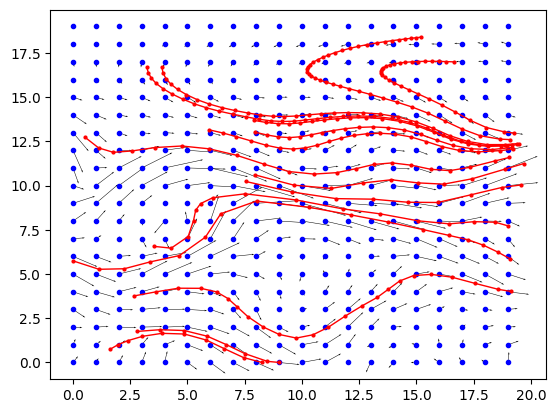

In [37]:
## code for RK method 

np.random.seed(1)
seed_points = np.random.uniform(0,19,size=(15,2))

def velocity_vector_rk(x,y,vecs):
   # print(x,y)
   if (0 <= x <= 19) and (0 <= y <= 19):
      return Bilinear_interpolation(x,y,vecs)
   else:
      return 0,0

def position_calculation_rk(x, y, vecs, time_step):
   """ 
   input positions x,y, vector field and time step
   it returns next position (x1,y1)
   """
   
   k1_x, k1_y = velocity_vector_rk(x,y,vecs)
   k2_x, k2_y = velocity_vector_rk(x+time_step*k1_x/2, y+time_step*k1_y/2, vecs)
   k3_x, k3_y = velocity_vector_rk(x+time_step*k2_x/2, y+time_step*k2_y/2, vecs)
   k4_x, k4_y = velocity_vector_rk(x+time_step*k3_x, y+time_step*k3_y, vecs)
   x1 = x + (time_step/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
   y1 = y + (time_step/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)

   return x1,y1

def streamline_rk(x,y,vecs, time_step, no_steps):

   positions_x = []
   positions_y = []
   
   for i in range(no_steps):

      positions_x.append(x)
      positions_y.append(y) 
      x, y = position_calculation_rk(x, y, vecs, time_step)

      if not (0 <= x <= 19) or not (0 <= y <= 19):
         if x>20:
            x = 20 
         elif y>20:
            y = 20
         elif x<0:
            x = 0
         elif y <0:
            y=0
         positions_x.append(x)
         positions_y.append(y) 
         break
   return positions_x, positions_y

# Plot vectors
plt.plot(xx, yy, marker='.', color='b', linestyle='none')
plt.quiver(xx, yy, vecs_flat[:,0], vecs_flat[:,1], width=0.001)
# plt.scatter(seed_points[0:,0],seed_points[0:,1], s = 12, c= "red")

time_step = 0.0375
no_steps = 64
for seed in seed_points:
   positions_x,positions_y = streamline_rk(seed[0], seed[1], vecs, time_step=time_step, no_steps=no_steps)
   plt.plot(positions_x,positions_y,marker="o", color="red",markersize=2,linewidth=1)

plt.show()